In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
import os
num_steps = 100
sns.set(rc={'figure.figsize':(10, 10)})
splits = 8

In [32]:
def configure_dataframe(splits, num_samples, configuration_format="beliefs_{}_{}_{}"):
    filename = configuration_format.format(splits, num_samples, num_steps)
    filepath = os.path.join(str(Path.home()), "master_thesis/code/hythe-src/beliefs_data", filename)
    return pd.read_pickle(filepath)

def plot_beliefs(df):
    agents = df["Agent"].unique()
    for agent in agents:
        plt.figure()
        plt.ylim([0.0, 0.05])
        df_agent = df[df["Agent"] == agent]
        sns.lineplot(x="Step", y="Beliefs", data=df_agent, hue="HyNum", legend="full")
    return

def plot_frames(df1, df2):
    for agent in agents:
        plt.figure()
        df1_agent = df1[df1["Agent"] == agent]
        df2_agent = df2[df2["Agent"] == agent]
        print("Beliefs for agent", agent)
        sns.lineplot(x="Step", y="Beliefs", data=df1_agent, hue="HyNum", legend="full", palette=sns.color_palette("Blues", n_colors=splits))
#         plt.figure()

        sns.lineplot(x="Step", y="Beliefs", data=df2_agent, hue="HyNum", legend="full", palette=sns.color_palette("Reds", n_colors=splits))

    return

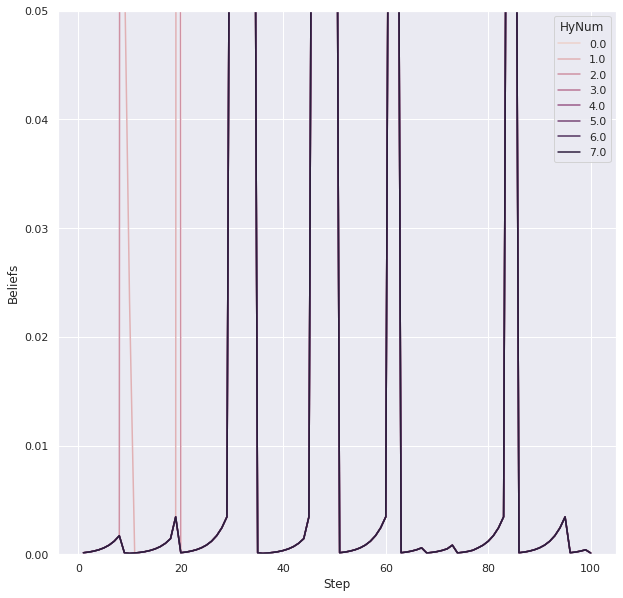

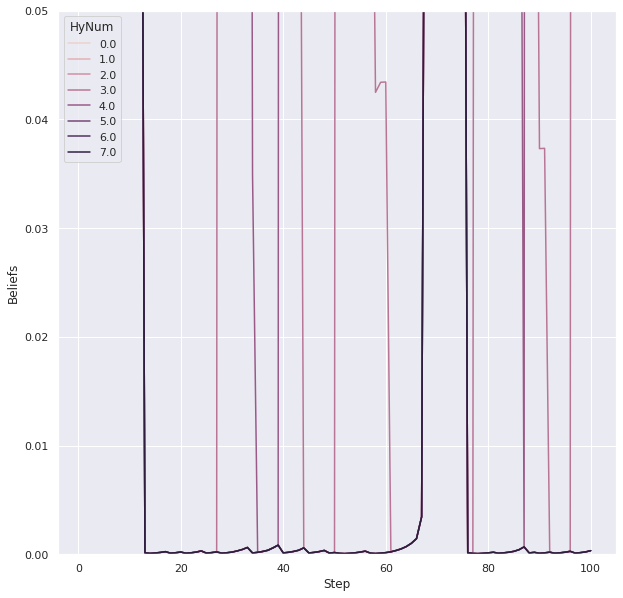

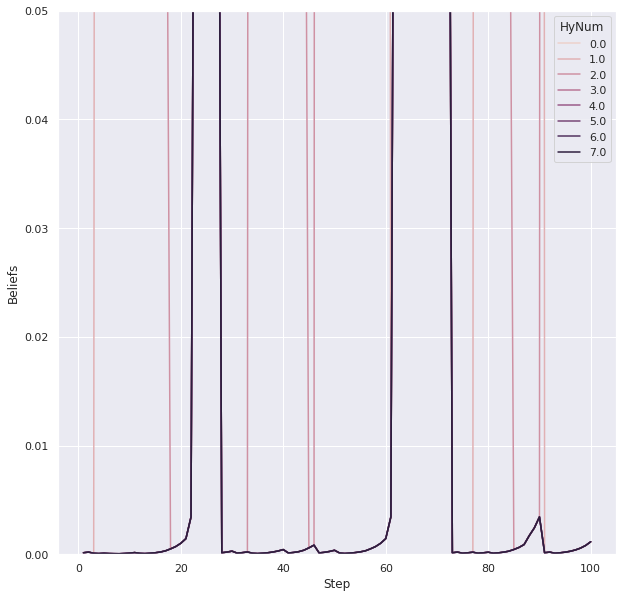

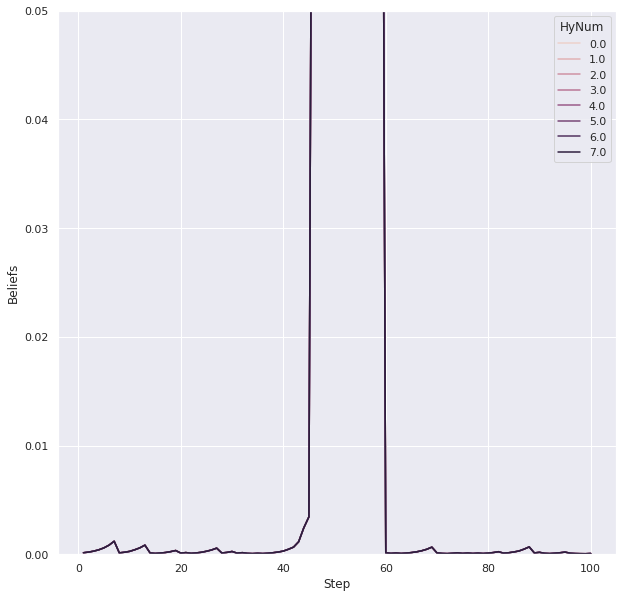

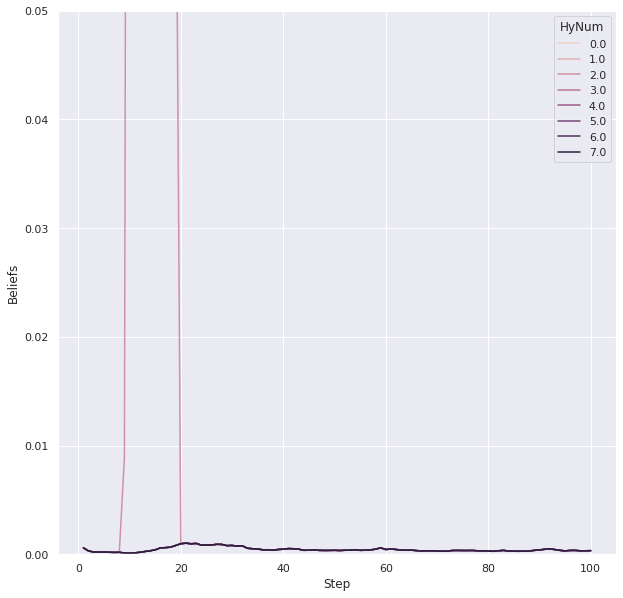

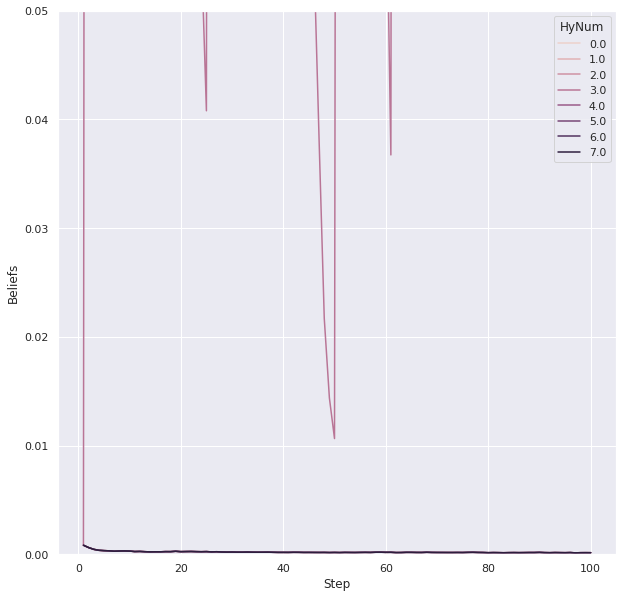

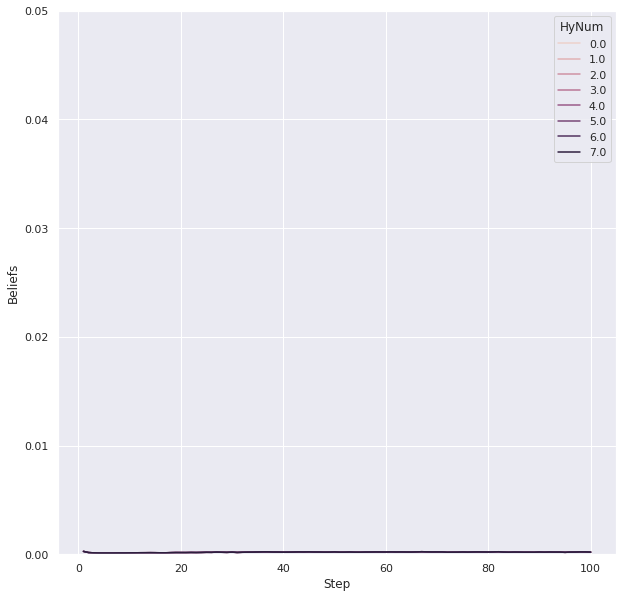

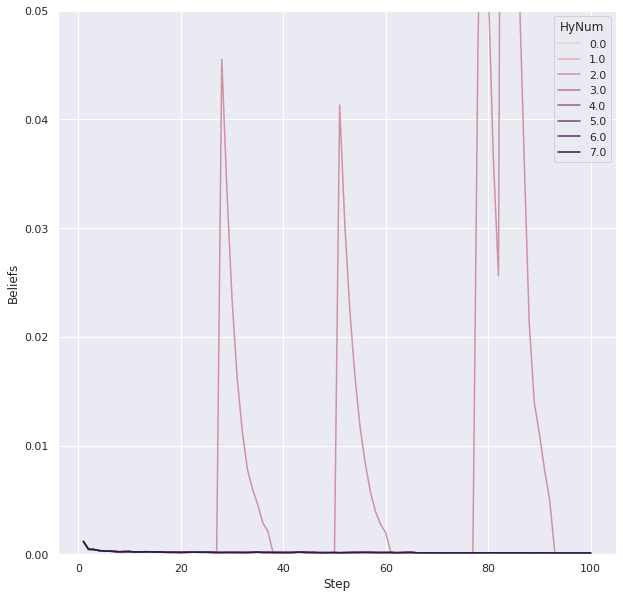

In [33]:
df0 = configure_dataframe(8, 1)
plot_beliefs(df0)
df01 = configure_dataframe(8, 100)
plot_beliefs(df01)


In [34]:
df1 = configure_dataframe(8, 500)
agents = df1.Agent.unique()

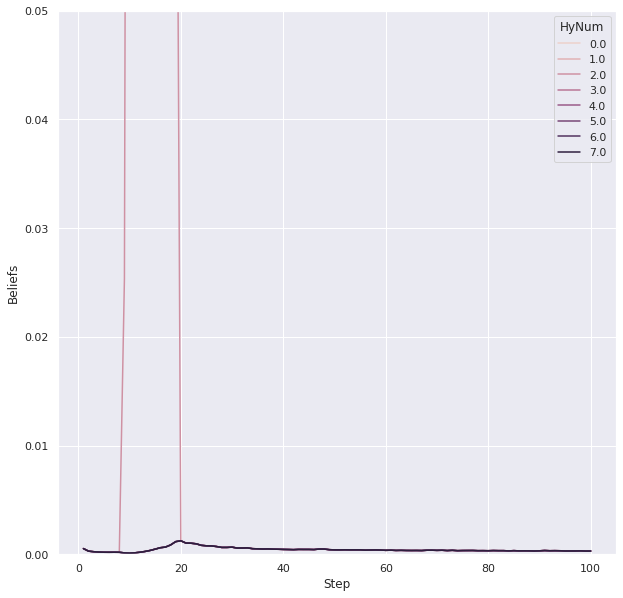

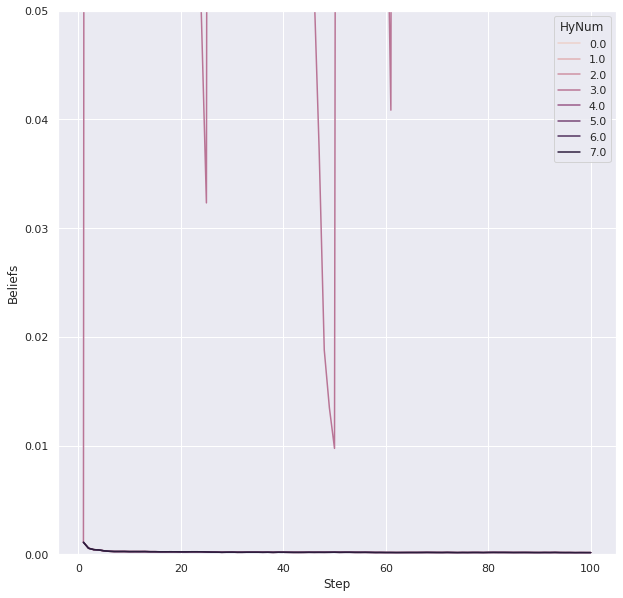

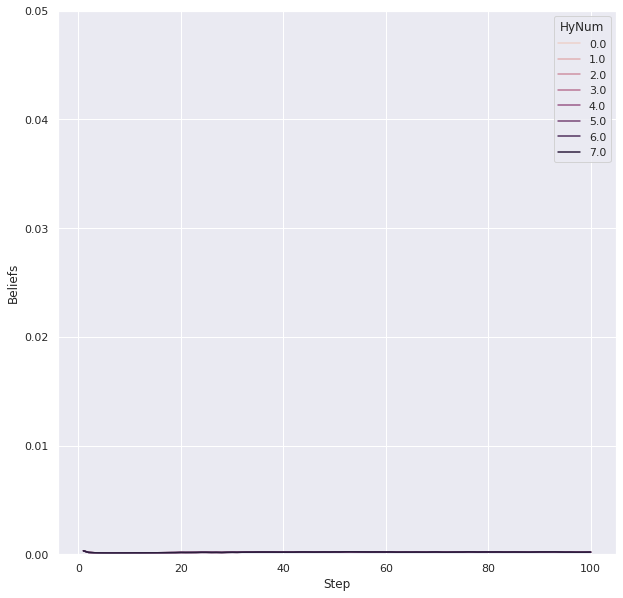

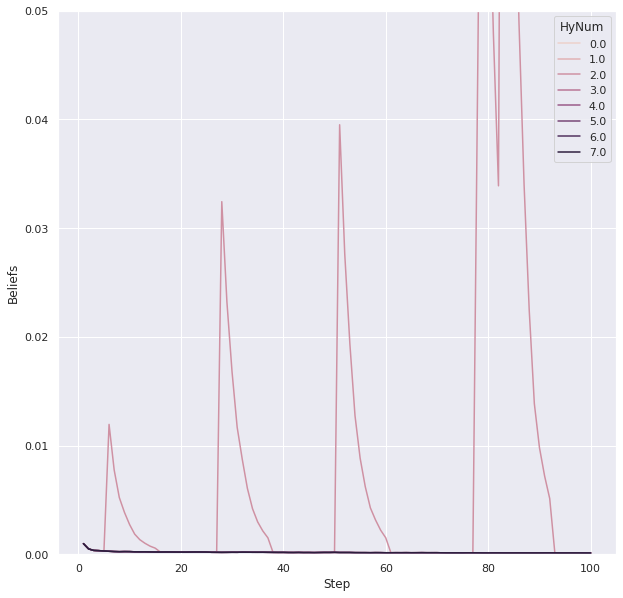

In [35]:
plot_beliefs(df1)

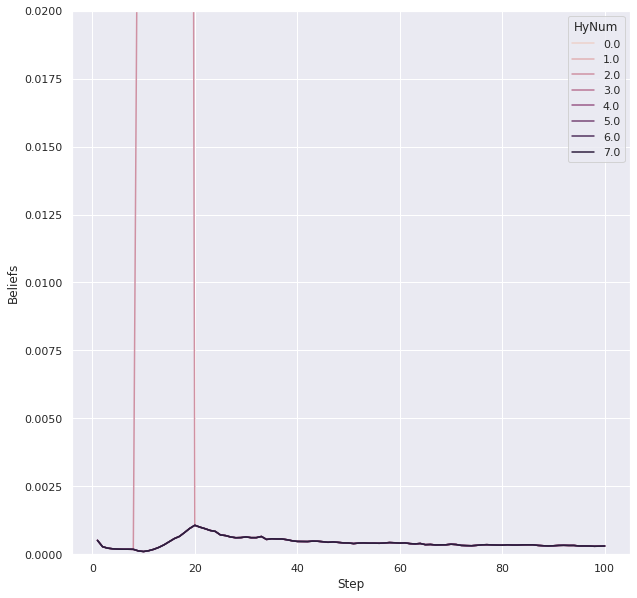

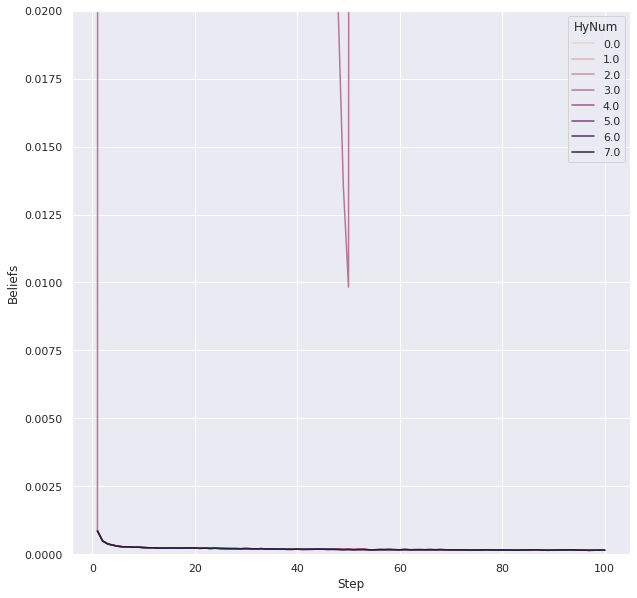

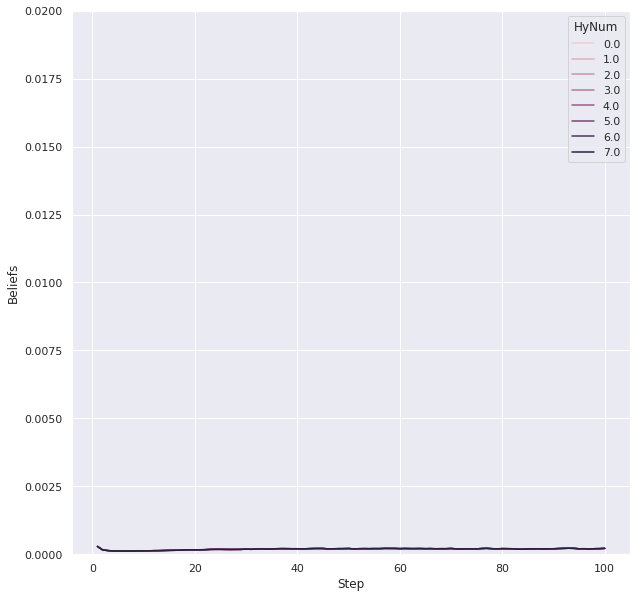

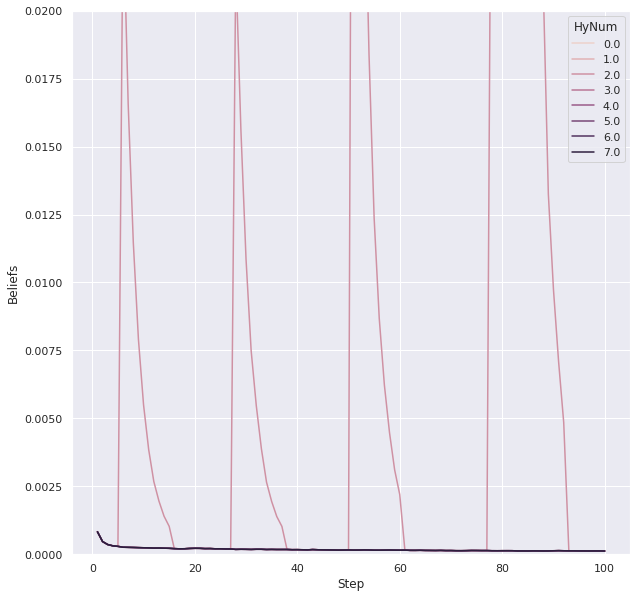

In [30]:
df2 = configure_dataframe(8, 1000)
plot_beliefs(df2)

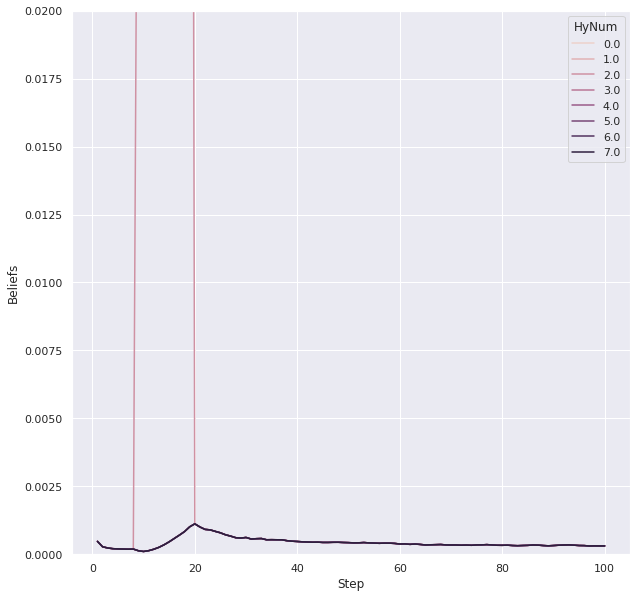

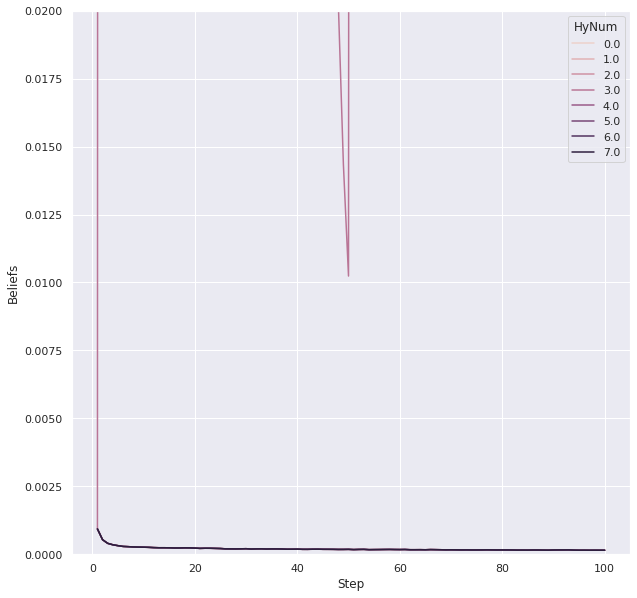

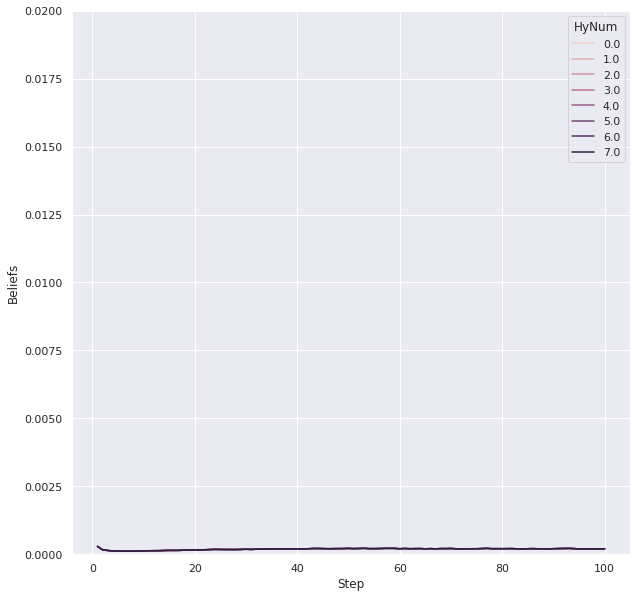

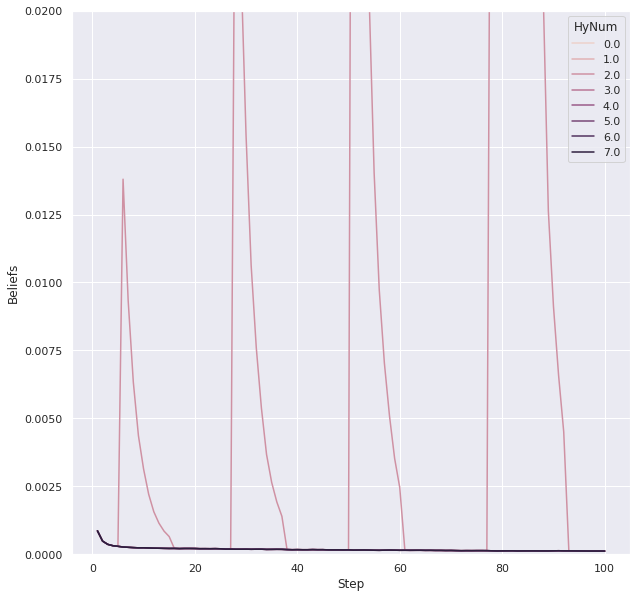

In [31]:
df3 = configure_dataframe(8, 5000)
plot_beliefs(df3)

In [17]:
df4 = configure_dataframe(8, 10000)
# plot_beliefs(df4)

In [18]:
df5 = configure_dataframe(8, 100000)
# plot_beliefs(df5)

Beliefs for agent 1.0
Beliefs for agent 2.0
Beliefs for agent 3.0
Beliefs for agent 4.0


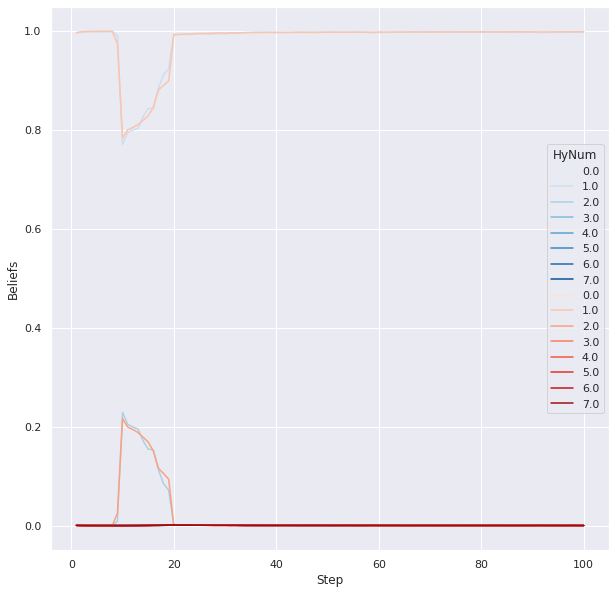

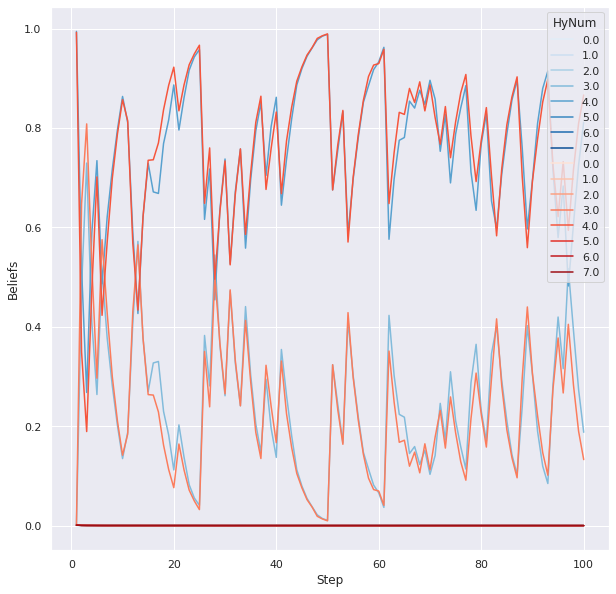

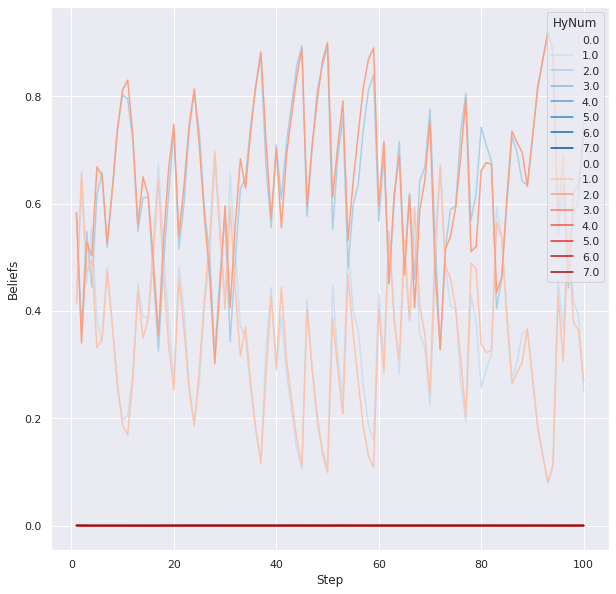

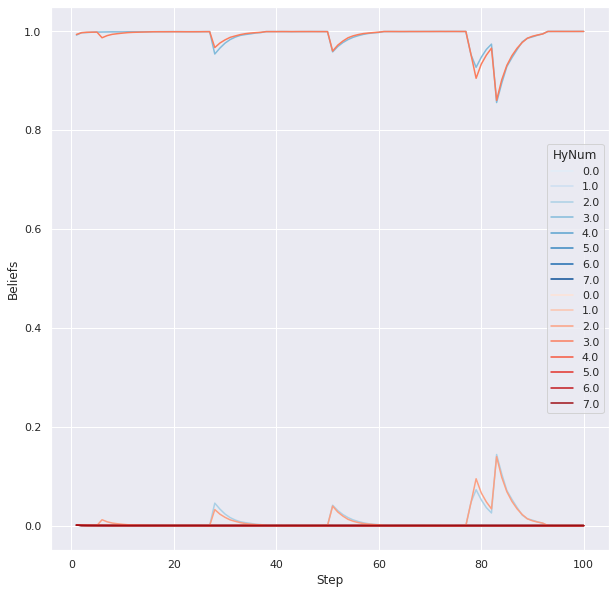

In [14]:
plot_frames(df01, df1)

Beliefs for agent 1.0
Beliefs for agent 2.0
Beliefs for agent 3.0
Beliefs for agent 4.0


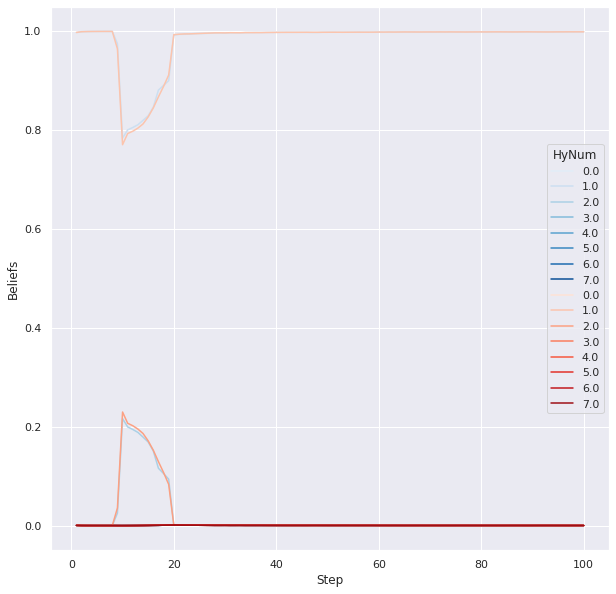

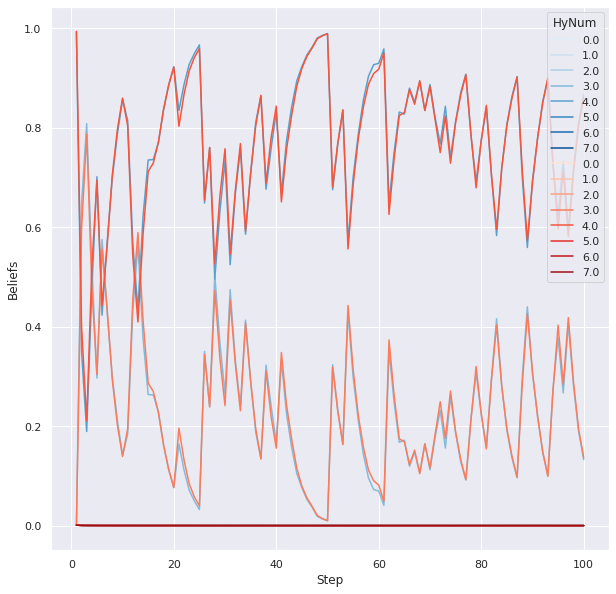

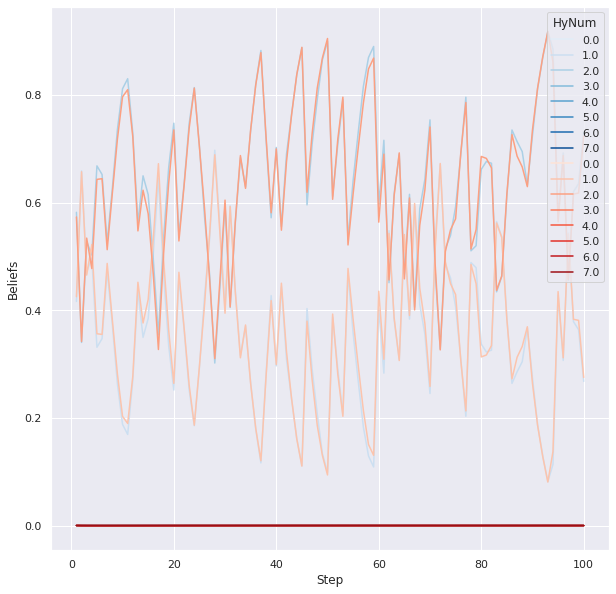

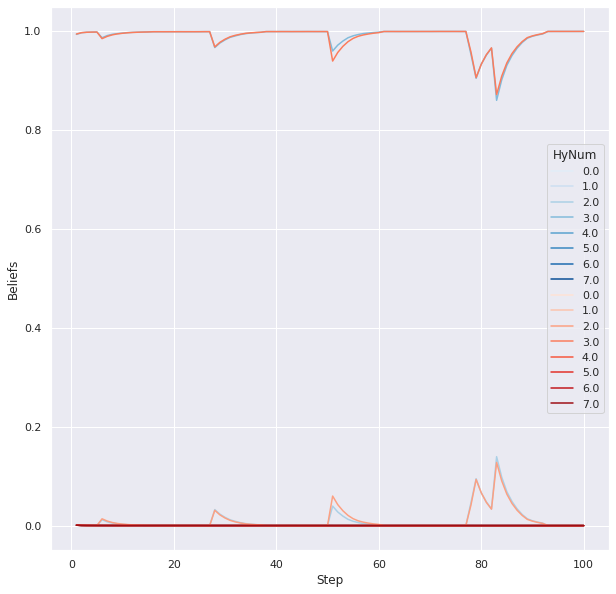

In [19]:
plot_frames(df1, df3)